In [ ]:
pip install -r requirements.txt

  Using cached streamlit-1.30.0-py2.py3-none-any.whl (8.4 MB)
  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Wave-0.0.2-py3-none-any.whl
  Using cached validators-0.22.0-py3-none-any.whl (26 kB)
  Using cached GitPython-3.1.41-py3-none-any.whl (196 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached watchdog-3.0.0-py3-none-manylinux2014_x86_64.whl (82 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, wh

In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset, Dataset
from huggingface_hub import snapshot_download
import os
import pandas as pd
import torchaudio

In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
# Step 1: Download the dataset
base_path = snapshot_download(repo_id="PFEE-TxE/audio_sampler", repo_type="dataset",cache_dir="dataset")

# Define the paths for each sub-folder
data_path = os.path.join(base_path, 'data')
accacia_path = os.path.join(data_path, 'accacia')
bouleau_path = os.path.join(data_path, 'bouleau')
chene_path = os.path.join(data_path, 'chene')
sapin_path = os.path.join(data_path, 'sapin')

# Create sub-folders if they don't exist
os.makedirs(accacia_path, exist_ok=True)
os.makedirs(bouleau_path, exist_ok=True)
os.makedirs(chene_path, exist_ok=True)
os.makedirs(sapin_path, exist_ok=True)

# Load the metadata
metadata_df = pd.read_csv(os.path.join(data_path, 'data.csv'))
metadata_df['file_path'] = metadata_df.apply(lambda row: os.path.join(data_path, row['label'], row['filename']), axis=1)
dataset_df = metadata_df[metadata_df['is_in_dataset']]



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 687 files:   0%|          | 0/687 [00:00<?, ?it/s]

In [ ]:
unique_labels = sorted(set(dataset_df['label']))  # Assuming metadata_df contains your labels
label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
dataset_df['label_id'] = dataset_df['label'].map(label_to_id)
id_to_label = {idx: label for label, idx in label_to_id.items()}
dataset_df.head(50)


<ipython-input-6-e7c2e7d59eaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['label_id'] = dataset_df['label'].map(label_to_id)


,file_id,label,user_name,date,timestamp,filename,user_ip,is_in_dataset,hugging_face_link,file_path,label_id
0,dc09357b,bouleau,stanley_s,2023-11-09 11:21:39,1.699525e+09,Bouleau-dc09357b.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
1,a0dde262,bouleau,stanley_s,2023-11-09 11:22:10,1.699525e+09,Bouleau-a0dde262.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
2,e6cac553,bouleau,stanley_s,2023-11-09 11:22:12,1.699525e+09,Bouleau-e6cac553.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
3,6f8a158a,bouleau,stanley_s,2023-11-09 11:22:15,1.699525e+09,Bouleau-6f8a158a.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
4,cf0dc1d7,bouleau,stanley_s,2023-11-09 11:22:17,1.699525e+09,Bouleau-cf0dc1d7.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
5,b46a7125,bouleau,stanley_s,2023-11-09 11:22:19,1.699525e+09,Bouleau-b46a7125.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
6,8d4160e3,bouleau,stanley_s,2023-11-09 11:22:21,1.699525e+09,Bouleau-8d4160e3.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
7,473c6288,bouleau,stanley_s,2023-11-09 11:22:24,1.699525e+09,Bouleau-473c6288.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
8,5d768d95,bouleau,stanley_s,2023-11-09 11:22:26,1.699525e+09,Bouleau-5d768d95.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1
9,4fb5a675,bouleau,stanley_s,2023-11-09 11:22:28,1.699525e+09,Bouleau-4fb5a675.wav,192.168.1.13,True,https://huggingface.co/datasets/PFEE-TxE/audio...,dataset/datasets--PFEE-TxE--audio_sampler/snap...,1


In [ ]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
import torchaudio
from datasets import Dataset
from transformers import DataCollatorWithPadding
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


In [ ]:
train_df, test_df = train_test_split(dataset_df, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(train_df)}")
print(f"Testing Set Size: {len(test_df)}")


Training Set Size: 391
Testing Set Size: 98


In [ ]:
def calculate_label_proportions(df):
    label_counts = df['label'].value_counts()
    total_samples = len(df)
    proportions = label_counts / total_samples
    return proportions

In [ ]:
# Calculate proportions for training set
train_label_proportions = calculate_label_proportions(train_df)
print("Training Set Label Proportions:")
print(train_label_proportions)
# Calculate proportions for testing set
test_label_proportions = calculate_label_proportions(test_df)
print("\nTesting Set Label Proportions:")
print(test_label_proportions)


Training Set Label Proportions:
sapin      0.260870
accacia    0.258312
chene      0.245524
bouleau    0.235294
Name: label, dtype: float64

Testing Set Label Proportions:
bouleau    0.326531
accacia    0.244898
sapin      0.234694
chene      0.193878
Name: label, dtype: float64


In [ ]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h").wav2vec2


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You sho

In [ ]:
import torch.nn as nn
from transformers import Wav2Vec2Config

num_labels = len(unique_labels)
model.classifier = nn.Linear(model.config.hidden_size, num_labels)

model.config.problem_type = "single_label_classification"


In [ ]:
def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = torchaudio.load(batch["file_path"])
    batch["speech"] = speech_array.squeeze().numpy()
    batch["sampling_rate"] = sampling_rate
    batch["target_text"] = batch["label"]
    return batch

In [ ]:
train_dataset = train_dataset.map(speech_file_to_array_fn)
test_dataset = test_dataset.map(speech_file_to_array_fn)


Map:   0%|          | 0/391 [00:00<?, ? examples/s]

Map:   0%|          | 0/98 [00:00<?, ? examples/s]

In [ ]:
def prepare_dataset(batch):
    # Process each example in the batch
    input_values= []
    labels= []
    for speech, sampling_rate, label_id in zip(batch["speech"], batch["sampling_rate"], batch["label_id"]):
        # Process the speech
        input_features = processor(speech, sampling_rate=sampling_rate, return_tensors="pt").input_values
        input_values.append(input_features.squeeze().tolist())

        labels.append(int(label_id))

    batch["input_values"] = input_values
    batch["labels"] = labels
    return batch

In [ ]:
train_dataset = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names, batch_size=8, batched=True)
test_dataset = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names, batch_size=8, batched=True)
# Print the first example from the training set
print(train_dataset[0])
# Print the first example from the testing set
print(test_dataset[1])


Map:   0%|          | 0/391 [00:00<?, ? examples/s]

Map:   0%|          | 0/98 [00:00<?, ? examples/s]

{'input_values': [-0.009191565215587616, -0.027537129819393158, -0.027537129819393158, -0.027537129819393158, -0.02065754309296608, -0.018364347517490387, -0.022950738668441772, -0.009191565215587616, -0.006898369640111923, -1.8782473489409313e-05, 0.006860804278403521, -1.8782473489409313e-05, 0.004567608702927828, 0.013740391470491886, 0.02061997912824154, 0.025206370279192924, 0.04125874117016792, 0.034379154443740845, 0.034379154443740845, 0.043551936745643616, 0.03667235001921654, 0.03667235001921654, 0.025206370279192924, 0.013740391470491886, 0.013740391470491886, 0.011447195895016193, 0.011447195895016193, 0.013740391470491886, 0.011447195895016193, 0.013740391470491886, 0.013740391470491886, 0.013740391470491886, 0.016033586114645004, 0.0091540003195405, 0.002274413127452135, -0.0023119780234992504, -0.0046051740646362305, -0.0023119780234992504, 0.002274413127452135, -1.8782473489409313e-05, 0.002274413127452135, 0.013740391470491886, 0.02061997912824154, 0.034379154443740845

In [ ]:
def custom_collator(batch):
    # Check if 'input_values' is in the batch
    if 'input_values' not in batch[0]:
        raise KeyError("input_values key not found in batch. Check dataset preparation.")

    # Pad the input_values
    input_values = pad_sequence([torch.tensor(d["input_values"]) for d in batch], batch_first=True, padding_value=processor.feature_extractor.padding_value)
    labels = [d.get('labels', -1) for d in batch]
    labels = torch.tensor(labels)


    return {
        "input_values": input_values,
        "labels": labels
    }

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install transformers[torch]

In [ ]:
class CustomWav2Vec2ForClassification(nn.Module):
    def __init__(self, wav2vec2_model, classifier,num_labels):
        super().__init__()
        self.wav2vec2 = wav2vec2_model
        self.classifier = classifier
        self.num_labels = num_labels

    def forward(self, input_values,labels=None):
        wav2vec2_outputs = self.wav2vec2(input_values=input_values)
        if isinstance(wav2vec2_outputs, torch.Tensor):
            outputs = wav2vec2_outputs
        else:
            outputs = wav2vec2_outputs.last_hidden_state

        outputs = outputs.mean(dim=1)  # Average pooling
        logits = self.classifier(outputs)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
num_labels = len(unique_labels)
model = CustomWav2Vec2ForClassification(model, model.classifier,num_labels)


In [ ]:
for i in range(len(train_dataset)):
    if 'labels' not in train_dataset[i]:
        print(f"Missing 'labels' in train_dataset at index: {i}")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [ ]:
training_args = TrainingArguments(
  output_dir="./wav2vec2-base-960h",
  group_by_length=True,
  per_device_train_batch_size=32,
  gradient_accumulation_steps=2,
  evaluation_strategy="steps",
  num_train_epochs=10,
  save_steps=500,
  eval_steps=500,
  logging_steps=500,
  learning_rate=1e-5,
  warmup_steps=50,
  save_total_limit=2,
)



In [ ]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=custom_collator,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

trainer.evaluate()

Step,Training Loss,Validation Loss


{'eval_loss': 0.8319920897483826,
 'eval_accuracy': 0.9285714285714286,
 'eval_f1': 0.9271465551719316,
 'eval_precision': 0.9404011604641856,
 'eval_recall': 0.9285714285714286,
 'eval_runtime': 2.5079,
 'eval_samples_per_second': 39.076,
 'eval_steps_per_second': 5.184,
 'epoch': 9.23}

In [ ]:
import torch

# Assuming 'model' is your trained model instance
torch.save(model.state_dict(), "Wav2Vec2_state_dict.pth")

# TO RELOAD THE MODEL DO THIS
# Recreate the model architecture
#model = CustomWav2Vec2ForClassification(*args, **kwargs)  # Replace with the actual arguments

# Load the state dictionary
#model.load_state_dict(torch.load(model_save_path))
#model.eval()  # Set the model to evaluation mode


In [ ]:
# Assuming trainer is your Trainer instance with the model, training_args, etc., already set up

# Evaluate the model on the test dataset
eval_results = trainer.evaluate()

# Print evaluation results
print(f"Evaluation Results: {eval_results}")


Evaluation Results: {'eval_loss': 0.8319920897483826, 'eval_accuracy': 0.9285714285714286, 'eval_f1': 0.9271465551719316, 'eval_precision': 0.9404011604641856, 'eval_recall': 0.9285714285714286, 'eval_runtime': 6.3814, 'eval_samples_per_second': 15.357, 'eval_steps_per_second': 2.037, 'epoch': 9.23}


In [ ]:
predictions_output = trainer.predict(test_dataset)
predictions = np.argmax(predictions_output.predictions, axis=-1)
true_labels = predictions_output.label_ids


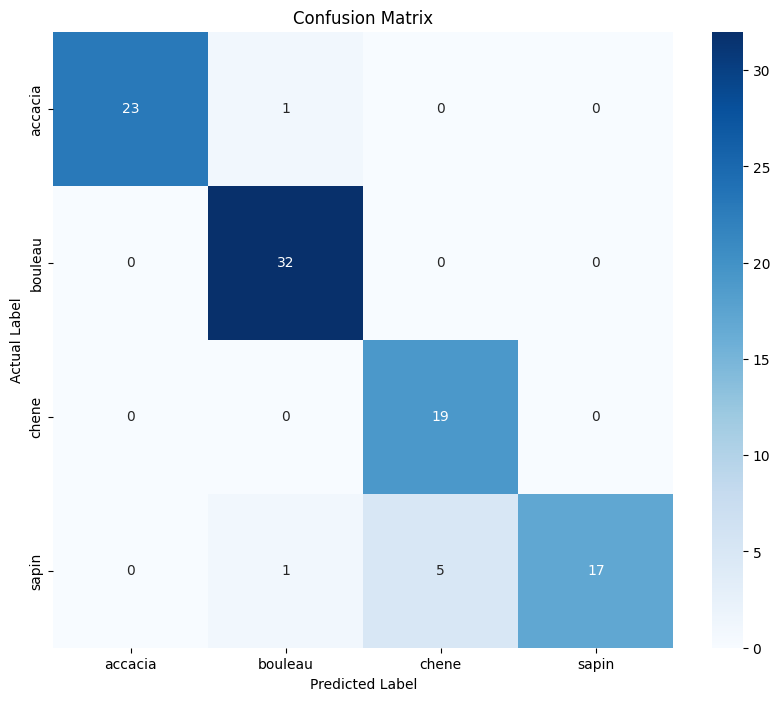

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert numeric labels to string labels
string_true_labels = [id_to_label[label_id] for label_id in true_labels]
string_predictions = [id_to_label[label_id] for label_id in predictions]


cm = confusion_matrix(string_true_labels, string_predictions,labels=list(id_to_label.values()))
# Plotting using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=id_to_label.values(),yticklabels=id_to_label.values())
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.9404011604641856
Recall: 0.9285714285714286
F1-Score: 0.9271465551719316
